In [1]:
import xnet
import json
import glob
import util

import numpy as np
import matplotlib.pyplot as plt

from igraph import *
from util import save,load
from scipy.stats import pearsonr
from collections import defaultdict
from matplotlib.patches import Rectangle
from matplotlib.ticker import MaxNLocator
from matplotlib import transforms,gridspec

In [2]:
attr_pacs = util.get_attr_pacs() # nome dos atributos dos vértices que contem os códigos PACS
pac_list = util.get_pac_list() # lista de códigos válidos

In [3]:
def plot_average_div(authors_divs,valid_authors,filename,title):
    divs = defaultdict(lambda:[])
    for year,authors in valid_authors.items():
        for author in authors:
            if author in authors_divs:
                a_div = authors_divs[author]
                if year in a_div:
                    divs[year].append(a_div[year])
                else:
                    print(year,author)
                    
    X = []
    Y = []
    yerr = []
    for year,divs in divs.items():
        X.append(year)
        Y.append(np.mean(divs))
        yerr.append(np.std(divs))

    X = np.asarray(X)
    Y = np.asarray(Y)
    yerr = np.asarray(yerr)

    idxs = np.argsort(X)
    X = X[idxs]
    Y = Y[idxs]
    yerr = yerr[idxs]

    plt.figure(figsize=(10,3))
    plt.errorbar(X,Y,yerr=yerr,marker='o',ls='-')
    plt.xticks(rotation=45)
    plt.xlabel('year')
    plt.ylabel('diversity')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

In [4]:
data = xnet.xnet2igraph('data/citation_network_ge1985_pacs.xnet')

filenames = sorted(glob.glob('data/pacs/2lvls/*_delta4_multilevel2.xnet'))
pac_nets = []
for filename in filenames:
	net = xnet.xnet2igraph(filename)
	pac_nets.append(net)

In [5]:
# history_out_filename = 'data/authors_pac_out_3lvl_2multi.json'
# history_in_filename = 'data/authors_pac_in_3lvl_2multi.json'

# history_out_filename = 'data/authors_pac_out_2lvls.json'
# history_in_filename = 'data/authors_pac_in_2lvls.json'

history_out_filename = 'data/authors_pac_out_2lvls_2multi.json'
history_in_filename = 'data/authors_pac_in_2lvls_2multi.json'
history_filename = 'data/authors_pac_2lvls_2multi.json'

In [6]:
# get_pac_comm_freq(data,pac_nets,util.get_pacs_out,4,history_out_filename)
# get_pac_comm_freq(data,pac_nets,util.get_pacs_in,4,history_in_filename)
# placeholder = get_num_citations(data,'authors_citations.json')
# get_pac_comm_freq(data,pac_nets,util.get_pacs_paper_published,4,history_filename)
print()

In [7]:
history_out = load(history_out_filename)
authors_out_div = authors_div(history_out) # diversidade das publicações citadas (author out)

NameError: name 'authors_div' is not defined

In [ ]:
history_in = load(history_in_filename)
authors_in_div = authors_div(history_in) # diversidade das publicações que citam o autor (author in)

In [ ]:
valid_authors_by_area = get_area(data,util.get_pacs_paper_published,4)

In [ ]:
# authors_num_in = load('num_of_citations.json') # número de citações do autor
# authors_num_out = load('num_of_refs.json') # número de referências do autor
# ranking_in = util.authors_ranking(authors_num_in) # autores com mais citações (out)
# ranking_out = util.authors_ranking(authors_num_out) # autores que mais referenciam (in)

In [ ]:
# top1000_in = load('authors_in_ranking1000_by_year.json')
# top1000_out = load('authors_out_ranking1000_by_year.json')
# top500_in = load('authors_in_ranking500_by_year.json')
# top500_out = load('authors_out_ranking500_by_year.json')

top_min25 = load('authors_ranking_min25_by_year.json')
for year,authors in top_min25.items():
    print(year,len(authors))

# plot_average_div(authors_in_div,top_min25,'temp/2lvls_2multilevel/min25_in_average_div_in.pdf','média de diversidade das citações dos autores com min 25 citações e 25 referências')
# plot_average_div(authors_out_div,top_min25,'temp/2lvls_2multilevel/min25_in_average_div_out.pdf','média de diversidade das referências dos autores com min 25 citações e 25 referências')

In [16]:
# top 10 average div
# plot_average_div(authors_in_div,top1000_in,'temp/2lvls_2multilevel/top1000_in_average_div_in.pdf','média de diversidade das citações do top 1000 autores com mais citações')
# plot_average_div(authors_out_div,top1000_in,'temp/2lvls_2multilevel/top1000_in_average_div_out.pdf','média de diversidade das referências do top 1000 autores com mais citações')
# plot_average_div(authors_out_div,top1000_out,'temp/2lvls_2multilevel/top1000_out_average_div_out.pdf','média de diversidade das referências do top 1000 autores com mais referências')
# plot_average_div(authors_in_div,top1000_out,'temp/2lvls_2multilevel/top1000_out_average_div_in.pdf','média de diversidade das citações do top 1000 autores com mais referências')

In [17]:
# top 10 average div
# plot_average_div(authors_in_div,top500_in,'temp/2lvls_2multilevel/top500_in_average_div_in.pdf','média de diversidade das citações do top 500 autores com mais citações')
# plot_average_div(authors_out_div,top500_in,'temp/2lvls_2multilevel/top500_in_average_div_out.pdf','média de diversidade das referências do top 500 autores com mais citações')
# plot_average_div(authors_out_div,top500_out,'temp/2lvls_2multilevel/top500_out_average_div_out.pdf','média de diversidade das referências do top 500 autores com mais referências')
# plot_average_div(authors_in_div,top500_out,'temp/2lvls_2multilevel/top500_out_average_div_in.pdf','média de diversidade das citações do top 500 autores com mais referências')

In [18]:
def get_y(xs,X1,Y1):
    ys1 = []
    for x in xs:
        x = str(x)
        try:
            i = X1.index(x)
            v = Y1[i]
        except:
            v = 0
        ys1.append(v)
    return ys1

In [23]:
def get_div_points(valid,authors1,authors2,valid_authors_by_area):
    div_points = defaultdict(lambda:defaultdict(lambda:[]))
    
    for year,valid_authors in valid_authors_by_area.items():
        year = str(year)
        for comm,authors in valid_authors.items():
            authors = set(authors)
            for author in authors:
                if author in valid[year] and author in authors1 and author in authors2:
                    x = authors1[author]
                    y = authors2[author]
                    if year in x and year in y:
                        div_points[year][comm].append((x[year],y[year]))
    return div_points

def plot_line_with_freq(fig,gs,X,Y,title,xlabel,ylabel,comm):
    '''
    fig = plt.figure(figsize=(16, 8)) 
    fig.suptitle(year)
    gs = gridspec.GridSpec(2, 4, width_ratios=[1,3,1,3],height_ratios=[3,1]) 
    '''
    
    #----------------------------------------------------------------------
    # todos os dados
#     print(comm)
    ax1 = fig.add_subplot(gs[:3,comm*4+1:comm*4+4])
    ax1.scatter(X, Y, lw=2, alpha=0.4)
    
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax1.set_title(title)
#     ax1.legend()
    
#     rect = Rectangle((min(X0),min(Y0)),max(X0)-min(X0),max(Y0)-min(Y0),fill=False,color='red')
#     ax1.add_patch(rect)
    
    ax2 = fig.add_subplot(gs[:3,comm*4],sharey=ax1)
    ax2.set_ylabel(ylabel)
    n, bins, patches = ax2.hist(Y,50,orientation='horizontal')
    ax2.invert_xaxis()

    ax3 = fig.add_subplot(gs[3,comm*4+1:comm*4+4],sharex=ax1)
    ax3.set_xlabel(xlabel)
    n, bins, patches = ax3.hist(X, 50)
    ax3.invert_yaxis()
    
    #----------------------------------------------------------------------
    # retângulo
    '''    
    ax1 = fig.add_subplot(gs[3])
    ax1.scatter(X0, Y0, lw=2, alpha=0.4)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax1.set_title(title0)
    ax1.legend()
    
    ax2 = fig.add_subplot(gs[2],sharey=ax1)
#     ax2.set_ylabel(ylabel)
    n, bins, patches = ax2.hist(Y0, 50,orientation='horizontal')
    ax2.invert_xaxis()

    ax3 = fig.add_subplot(gs[7],sharex=ax1)
    ax3.set_xlabel(xlabel)
    n, bins, patches = ax3.hist(X0, 50)
    ax3.invert_yaxis()
    '''
    #----------------------------------------------------------------------
    
#     fig.savefig(filename)
#     plt.close()
    return fig

def axis_filter(X):
    X_count,X_bins = np.histogram(X, bins=50)
    
    idx_max = np.argmax(X_count)
    
    q25 = X_bins[max(idx_max-3,0)]
    q75 = X_bins[min(idx_max+4,len(X_bins)-1)]
    X_idxs = np.logical_and(X >= q25, X < q75)
    return X_idxs
    
def filter_subseq(X,Y):
    X_idxs = axis_filter(X)
    Y_idxs = axis_filter(Y)
#     q25 = np.quantile(Y,0.25)
#     q75 = np.quantile(Y,0.75)
#     Y_idxs = np.logical_and(Y > q25, Y < q75)
    
    idxs = np.logical_and(X_idxs,Y_idxs)
    if sum(idxs) < 3:
        idxs = X_idxs
    return X[idxs],Y[idxs]
    
def plot_div_points(div_points,xlabel,ylabel,name,header):
    corrs = []
    corrs0 = []
    years = []
    for year in ['2006','2007','2008','2009','2010']:
        print('year',year)
        points_by_comm = div_points[year]
        N = max([int(x) for x in points_by_comm])
        print('N',N,points_by_comm.keys())
        
        fig = plt.figure(figsize=(4*N,4))
        fig.suptitle(year)
        gs = gridspec.GridSpec(4,4*N,figure=fig)
        
        for comm,points in points_by_comm.items():
            #TODO AQUI
            points = np.asarray(points)
            X = points[:,0]
            Y = points[:,1]
            if len(X) <= 2:
                continue
#             X0,Y0 = filter_subseq(X,Y)
            pear = pearsonr(X,Y)[0]
#             pear0 = pearsonr(X0,Y0)[0]
#             title0 = "comm=%s; zoom \n(pear=%.3f; No points=%d)" % (comm,pear0,len(X0))

            years.append(year)
            corrs.append(pear)
            print(year,pear)
#             corrs0.append(pear0)

            title = "comm=%s; original \n(pear=%.3f; No points=%d)" % (comm,pear,len(X))

            #plt.locator_params(axis='x',integer=MaxNLocator(integer=True))
            #plt.xlabel(xlabel)
            #plt.ylabel(ylabel)
            #plt.xticks(rotation=45)
#             filename = header+'div_points_%s_%s_%s_%s_%s_zoom.pdf'%(name,year,xlabel,ylabel,comm)

            fig = plot_line_with_freq(fig,gs,X,Y,title,xlabel,ylabel,int(comm)-1)
        fig.savefig('div_points_%s.pdf'%year)
    plt.grid(True,alpha=0.3)
    plt.plot(years,corrs,'o',ls='-',color='blue',label='original')
#     plt.plot(years,corrs0,'o',ls='-',color='green',label='zoom')
    plt.title('correlação (pearson entre \n %s e %s)' % (xlabel,ylabel))
    #plt.xlabel(xlabel)
    #plt.ylabel(ylabel)
    #plt.legend()
    plt.xticks(rotation=45)
    plt.locator_params(axis='x',integer=MaxNLocator(integer=True))
    plt.savefig(header+'correlacao_%s_%s_%s.pdf' % (name,xlabel,ylabel))
    plt.close()

In [20]:
header = 'temp/2lvls_2multilevel/'

In [21]:
# header = 'temp/3lvls_2multilevel/'
div_points = get_div_points(top_min25,authors_in_div,authors_out_div,valid_authors_by_area) 

year 2006
N 9 dict_keys(['5', '2', '3', '1', '4', '9', '6', '7', '8'])
2006 0.8776910915822533
2006 0.8988829700322403
2006 0.8766826832256289
2006 0.8251296863019115
2006 0.8176719414635266
2006 0.8100226158423516
2006 0.8856910463086511
2006 0.8576618044138881
2006 0.8071494749762288
year 2007
N 9 dict_keys(['5', '2', '3', '1', '9', '4', '7', '6', '8'])
2007 0.8754846055200658
2007 0.8780804499542707
2007 0.8504247563349018
2007 0.8311121143338122
2007 0.7937789246569401
2007 0.8148024985573663
2007 0.8840587169342125
2007 0.8965088968902925
2007 0.842228652534714
year 2008
N 10 dict_keys(['6', '3', '1', '10', '5', '4', '8', '7', '9'])
2008 0.8837683334617702
2008 0.8729397009914744
2008 0.8365601018354903
2008 0.8180701271059975
2008 0.8146707898447059
2008 0.8698257031099101
2008 0.8094989480875256
2008 0.8913778972423242
2008 0.8608553993193415
year 2009
N 10 dict_keys(['7', '3', '1', '8', '6', '4', '9', '5', '10', '2'])
2009 0.8961583705728385
2009 0.8914557837015956
2009 0.85500

/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:144: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>


3314
1
885
711
878
1198
1733
5792
1115
2129
12889


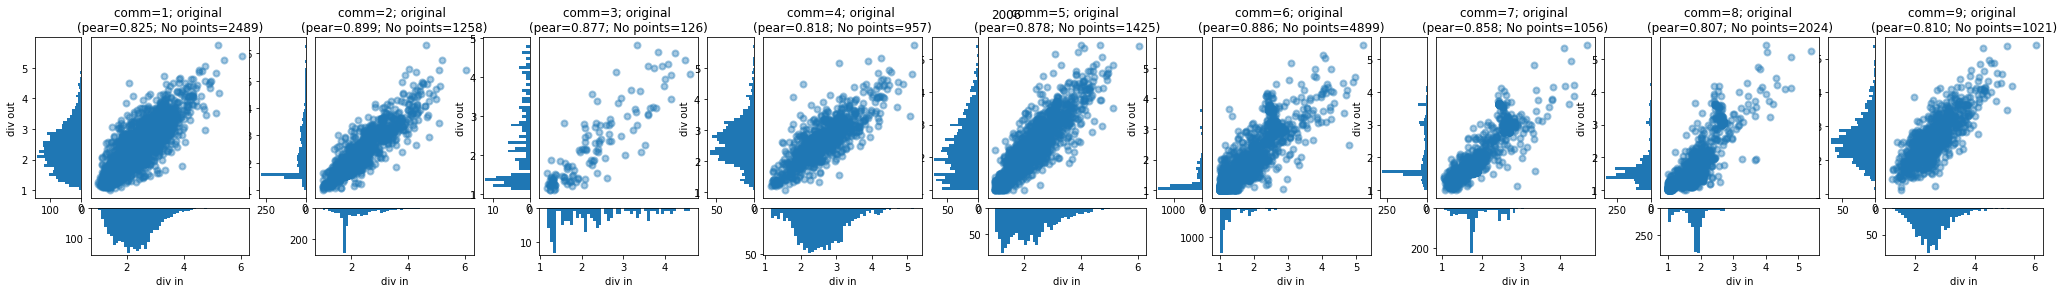

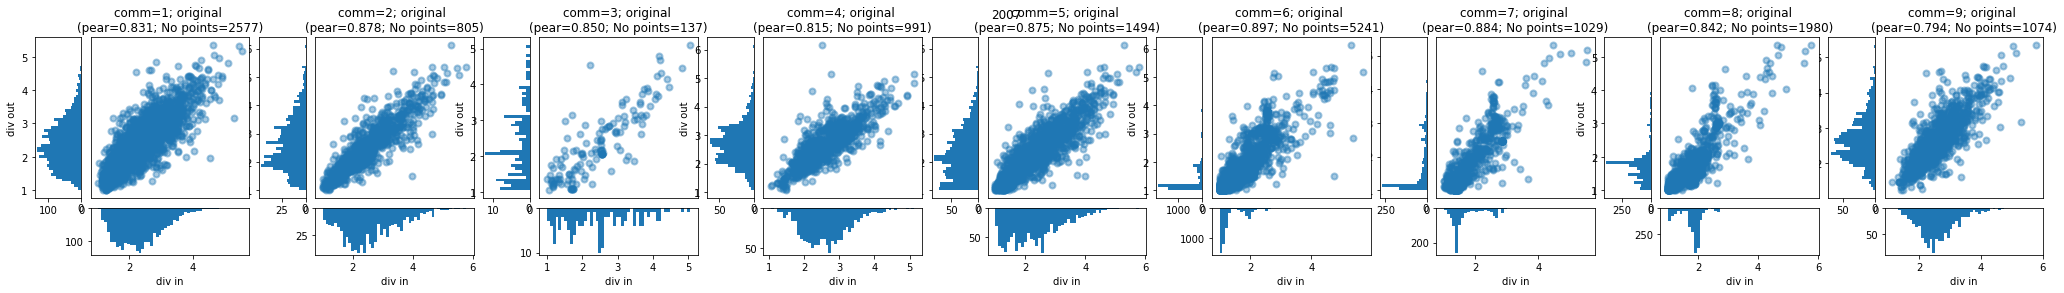

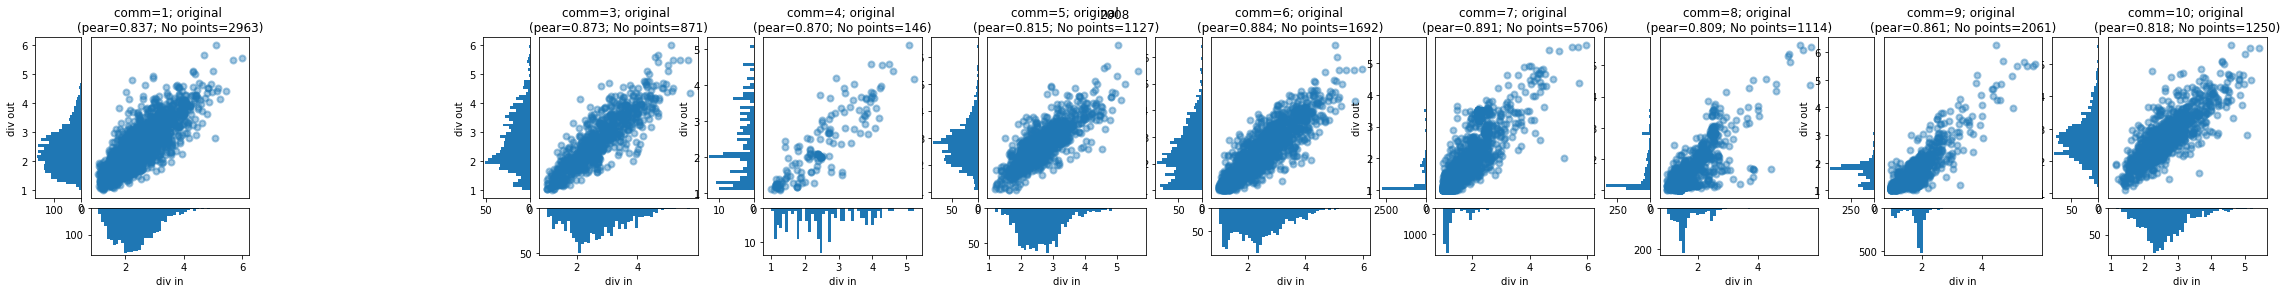

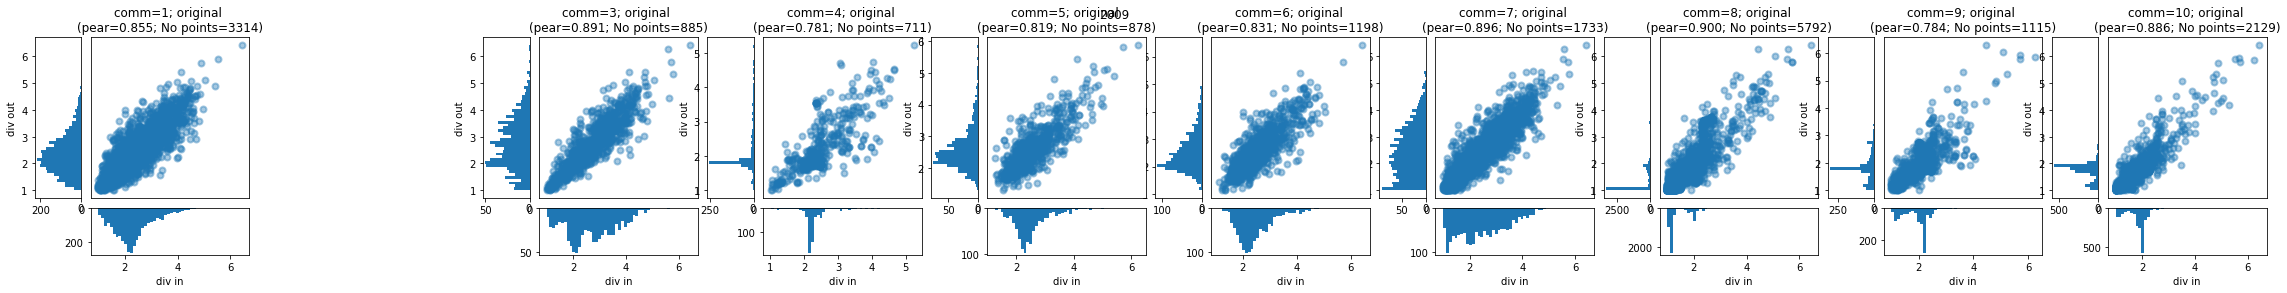

In [24]:
plot_div_points(div_points,'div in','div out','min 25 citações e referências',header)
print(len(div_points['2009']['1']))
print(len(div_points['2009']['2']))
print(len(div_points['2009']['3']))
print(len(div_points['2009']['4']))
print(len(div_points['2009']['5']))
print(len(div_points['2009']['6']))
print(len(div_points['2009']['7']))
print(len(div_points['2009']['8']))
print(len(div_points['2009']['9']))
print(len(div_points['2009']['10']))
print(len(top_min25['2009']))
# div_points = get_div_points(top500_in,authors_in_div,authors_out_div)
# plot_div_points(div_points,'div in','div out','top 500')

In [ ]:
freq_in = load('authors_in_freq2.json')
freq_out = load('authors_out_freq2.json')

In [ ]:
div_points,colors = get_div_points(top_min25,authors_out_div,freq_in)
plot_div_points(div_points,colors,'div out','freq in (2 anos)','min 25 citações e referências',header)

In [ ]:
# div_points = get_div_points(top1000_in,authors_in_div,freq_in)
# plot_div_points(div_points,'div in','freq in','top 1000')

In [ ]:
# div_points = get_div_points(top1000_in,authors_in_div,freq_out)
# plot_div_points(div_points,'div in','freq out','top 1000')

In [ ]:
# div_points = get_div_points(top1000_in,authors_out_div,freq_out)
# plot_div_points(div_points,'div out','freq out','top 1000')

In [ ]:
def get_assortativity(filenames,year,authors_in_div):
    assorts = []
    for filename in filenames:
        ranking = top_min25[str(year)]
        net = xnet.xnet2igraph(filename)

        valid_vtxs = []
        for author in net.vs:
            try:
                d = authors_in_div[author['name']][str(year)]
                author['div'] = d[0]
                valid_vtxs.append(author['name'])
            except:
                pass

        net = net.subgraph(valid_vtxs)
        assort = net.assortativity('div')
        assorts.append(assort)
        
        year += 1
        del net
    return assorts

In [ ]:
year = 1990
filenames = sorted(glob.glob('data/colabs/wcomb/colab*_multi1.xnet'))
assort_in = get_assortativity(filenames,year,authors_in_div)
assort_out = get_assortativity(filenames,year,authors_out_div)

In [ ]:
plt.figure(figsize=(12,3))
years = [1990+i for i in range(21)]
plt.plot(years,assort_in,'o',ls='-',label='div in')
plt.plot(years,assort_out,'o',ls='-',label='div out')
plt.legend()
plt.xlabel('year')
plt.ylabel('assortativity')
plt.xticks(years,rotation=45)
plt.tight_layout()
plt.savefig('assortativity.pdf',)

In [ ]:
# 2lvl 2multilevel ok
# min de 25 citaçoes e referencias ok
# numero de citacoes no futuro (2 anos) ok
# pintar por area dominante, fazer por grande area ok
# rede de colaboraço comuniades vs divs in ou div out (histograma dos autores)
# assortatividade divs com os autores que tem informaçoes ok

In [ ]:
def get_hist_div_comm(filenames,year,authors_in_div):
    for filename in filenames:
        ranking = top_min25[str(year)]
        net = xnet.xnet2igraph(filename)

        div_by_comm = defaultdict(lambda:[])
        for author in net.vs:
            try:
                d = authors_in_div[author['name']][str(year)][0]
                div_by_comm[author['community']].append(d)
            except:
                pass
        
        c = 0
        for comm,values in div_by_comm.items():
            if len(values) >= 50 and comm != '-1':
                plt.hist(values,bins=10)
                plt.show()
                plt.clf()
                c += 1
        print(c)
        
        year += 1
        del net
        break

In [ ]:
get_hist_div_comm(filenames,year,authors_in_div)